### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv.zip")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [17]:
freq_categories = df.category.value_counts()
freq_categories.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [10]:
prop_categories = df.category.value_counts(normalize=True).round(2)
prop_categories.head(5)

category
Sports & Outdoors                         0.34
Beauty                                    0.01
Handmade Clothing, Shoes & Accessories    0.01
Bath & Body                               0.01
Birthday Gifts                            0.01
Name: proportion, dtype: float64

In [14]:
df2 = pd.concat([freq_categories.head(5), prop_categories.head(5)], axis=1)
df2

,count,proportion
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01


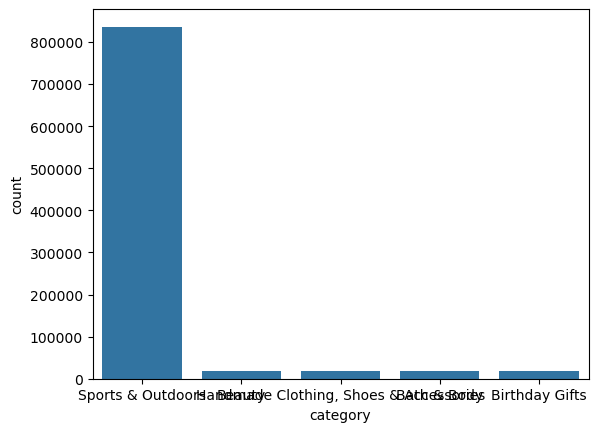

In [15]:
sns.barplot(
    x='category',
    y='count',
    data=df2,
)
plt.show()

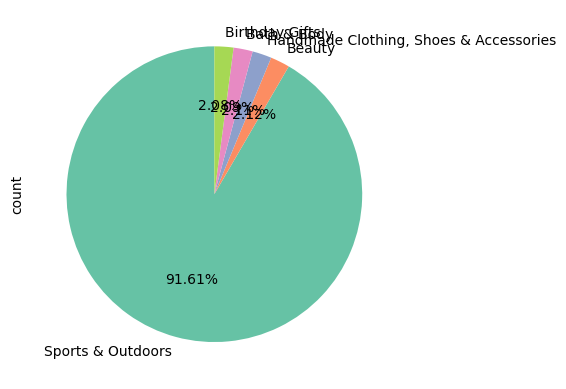

In [ ]:
freq_categories.head(5).plot.pie(autopct='%1.2f%%' ,startangle=90, colors=sns.color_palette('Set2'))
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [22]:
df.price.describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [23]:
df.price.mode()

0    9.99
Name: price, dtype: float64

In [ ]:
"""
Mean: 89.24
Median: 19.09
Mode: 9.99

The average price is much higher than the median and mode
"""

In [ ]:
round(df.price.var(),2)

119445.49

In [33]:
round(df.price.quantile(0.1),2)

5.99

In [35]:
round(df.price.quantile(0.01),2)

2.5

In [34]:
round(df.price.quantile(0.9),2)

149.99

In [36]:
round(df.price.quantile(0.99),2)

1408.82

In [ ]:
"""
Variance: 119445.49
std: 345.61
range: 0 - 100000
interquartile range: 9.99 - 45.99

50% of the prices are in the range from 9.99 to 45.99
80% of the prices are in the range from 5.99 to 149.99
98% of the prices are in the range from 2.5 to 1408.82
the max price us 100000
the min price is 0
"""

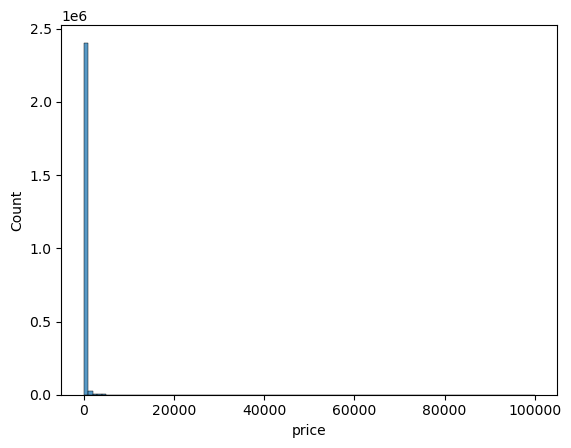

In [32]:
sns.histplot(df.price, bins=100)
plt.show()

In [ ]:
"""
It is difficult to read this chart because the vast majority of the prices (80%) are in the range from 5.99 to 149.99 which falls in the same bins,
and the 98% are in the range from 2.5 to 1408.82
We could leave out these outliers to get a more understandable graph as shown below, we can clearly see thar the distribution is positively skewed
and is leptokurtic
"""

In [40]:
df80 = df[(df["price"] < df.price.quantile(0.9)) & (df["price"] > df.price.quantile(0.1))]
df98 = df[(df["price"] < df.price.quantile(0.99)) & (df["price"] > df.price.quantile(0.01))]

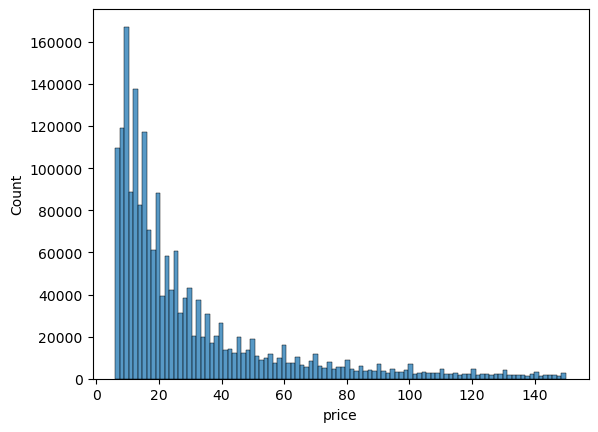

In [41]:
sns.histplot(df80.price, bins=100)
plt.show()

In [46]:
df80.price.skew().round(2)

1.98

In [47]:
df80.price.kurtosis().round(2)

3.77

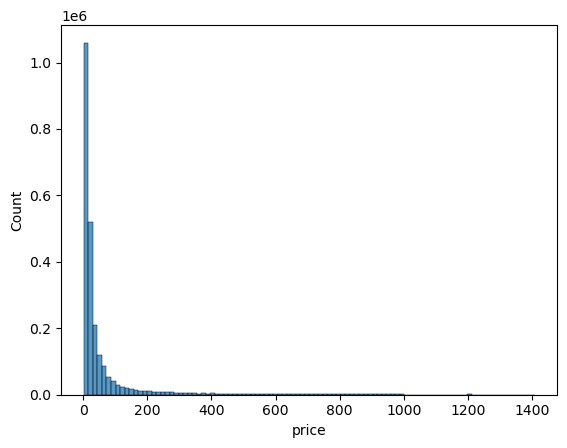

In [42]:
sns.histplot(df98.price, bins=100)
plt.show()

<Axes: ylabel='price'>

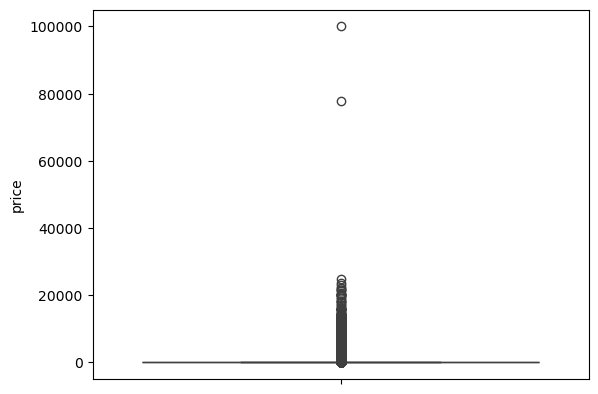

In [37]:
sns.boxplot(data=df.price)

In [ ]:
"""
As seen in the above graph, there are 2 products that are much more expensive than the rest, and a lot of other products thar are interquartile range
as the interquartile range is fairly low
Below we can see than even in the df with the 80% of the central products there are a lot of products outside the interquartile range on the upper side
"""

<Axes: ylabel='price'>

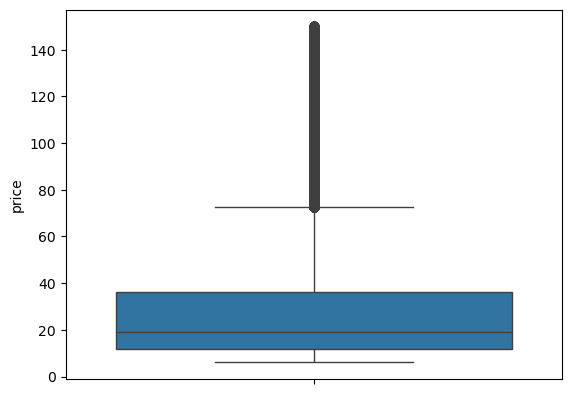

In [43]:
sns.boxplot(data=df80.price)

<Axes: ylabel='price'>

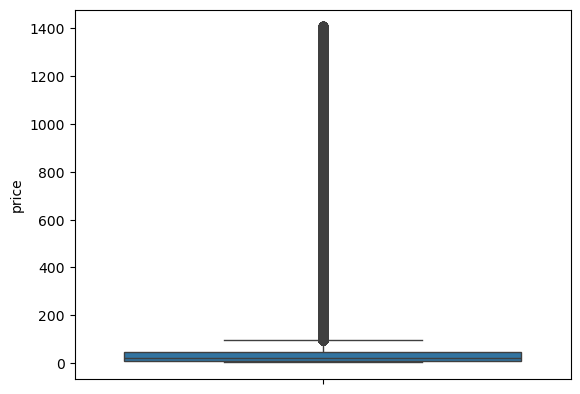

In [44]:
sns.boxplot(data=df98.price)

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [50]:
df.stars.describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [51]:
df.stars.mode()

0    0.0
Name: stars, dtype: float64

In [53]:
df.stars.value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [ ]:
"""
Mean: 2.15
Median: 0
Mode: 0

We can conclude that very few people leave a rating
"""

In [56]:
rating_df = df[df.stars > 0]
rating_df.stars.describe().round(2)

count    1218010.00
mean           4.32
std            0.56
min            1.00
25%            4.10
50%            4.40
75%            4.60
max            5.00
Name: stars, dtype: float64

In [57]:
rating_df.stars.mode()

0    4.5
Name: stars, dtype: float64

In [58]:
rating_df.stars.value_counts()

stars
4.5    151577
4.6    136995
4.4    136165
5.0    128492
4.3    112564
4.7     94566
4.2     86871
4.0     66089
4.1     65115
4.8     41858
3.9     36555
3.8     27876
3.7     21137
3.6     16219
3.5     14673
3.0     12819
4.9     11081
3.4     10355
1.0      8484
3.3      8269
3.2      5771
3.1      4679
2.0      3901
2.9      3341
2.8      2306
2.7      2104
2.5      2103
2.6      1579
2.4      1060
2.3       734
2.2       602
2.1       540
1.5       404
1.9       300
1.8       249
1.7       177
1.4       149
1.6       147
1.3        78
1.2        23
1.1         3
Name: count, dtype: int64

In [ ]:
"""
If we only consider the products that have a rating the values are:
Mean: 4.32
Median: 4.4
Mode: 4.5

We can conclude that the people are more prone to leave a rating when they are happy with the product
"""

In [59]:
df.stars.var()

4.81743402976196

In [ ]:
"""
Variance: 4.81
std: 2.19
range: 0 - 5
interquartile range: 0 - 4.4

50% of the ratings are in the range from 0 to 4.4 stars
percentile 50 is 0
the max rating is 5
the min rating is 0

We conclude that more than half of the products do not have a rating and that there is a really high variance and std deviation
"""

In [65]:
round(rating_df.stars.var(),2)

0.31

In [ ]:
"""
If we only consider the products that have a rating:
Variance: 0.31
std: 0.56
range: 1 - 5
interquartile range: 4.1 - 4.6

50% of the ratings are in the range from 4.1 to 4.6 stars
percentile 50 is 4.4
the max rating is 5
the min rating is 1

Here we conclude that the ratings are really consistent and the variation in customer feedback is low
"""

In [68]:
df.stars.skew().round(2)

0.08

In [69]:
df.stars.kurtosis().round(2)

-1.93

In [ ]:
"""
With all the rows we conclude that the distribution is practically symmetrical and has a negative kurtosis
"""

In [72]:
rating_df.stars.skew().round(2)

-2.38

In [73]:
rating_df.stars.kurtosis().round(2)

9.78

In [ ]:
"""
If we only consider the products that have a rating things change:
We conclude that the distribution is left-skewed and has a positive kurtosis
"""

In [81]:
df.stars.nunique()

42

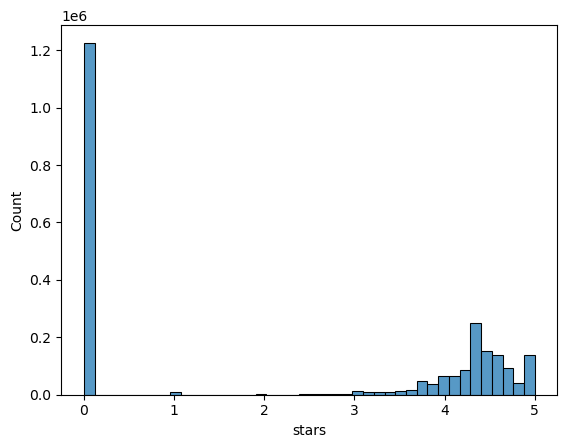

In [82]:
sns.histplot(df.stars, bins=42)
plt.show()

In [ ]:
"""
With all the rows we conclude that the most common rating is 0, meaning that they have no rating
"""

In [77]:
rating_df.stars.nunique()

41

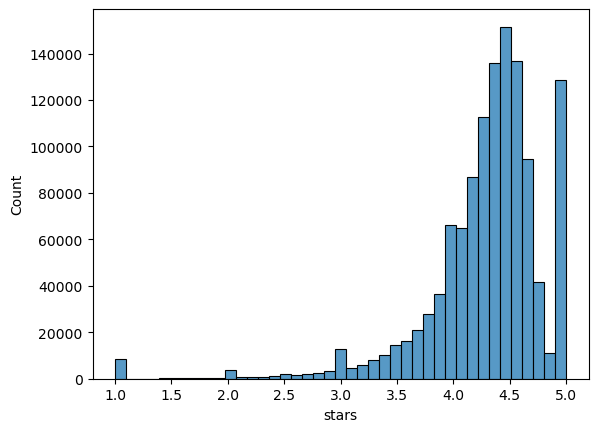

In [80]:
sns.histplot(rating_df.stars, bins=41)
plt.show()

In [ ]:
"""
If we only consider the products that have a rating we conclude that the most common rating is 4.5.
"""